# Introduction

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_palette('coolwarm')

### Importing Dataset

In [2]:
data = pd.read_csv("./solar_weather.csv")

### Checking the dataset

In [3]:
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
data.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

The dataset has 17 columns having 196776 data points. Out of theses 16 columns 1 column is 'Object' type, 6 columns are of 'Float64' type and rest 10 columns are of 'Int64' type.

### Missing Values

In [6]:
data.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

This dataset has no missing value so we don't have to do anything further about that.

### Data Manipulation

### Time

In [7]:
data['Time'] = pd.to_datetime(data['Time'])
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196776 non-null  datetime64[ns]
 1   Energy delta[Wh]        196776 non-null  int64         
 2   GHI                     196776 non-null  float64       
 3   temp                    196776 non-null  float64       
 4   pressure                196776 non-null  int64         
 5   humidity                196776 non-null  int64         
 6   wind_speed              196776 non-null  float64       
 7   rain_1h                 196776 non-null  float64       
 8   snow_1h                 196776 non-null  float64       
 9   clouds_all              196776 non-null  int64         
 10  isSun                   196776 non-null  int64         
 11  sunlightTime            196776 non-null  int64         
 12  dayLength               196776

In [9]:
data['Time'] = data['Time'].apply(lambda x: x.date())
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


The data-type of 'Time' column should be Datetime but it is object so we will convert it first. Then take out only date part out.

### Month

In [10]:
data['month'] = data['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
1,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
2,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
3,2017-01-01,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,January
4,2017-01-01,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,January


The month data is number format but we will change it into the name format i.e. 1 - January, 2 - February etc.

## Data Interpretation

Text(0, 0.5, 'Energy')

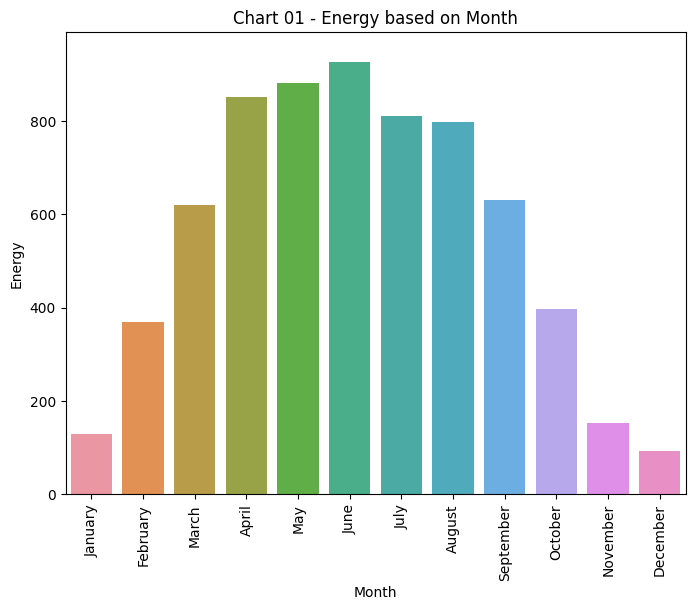

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['month'], y=data['Energy delta[Wh]'], errwidth=0)
plt.title('Chart 01 - Energy based on Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Energy')

The lowest energy producing months are January, November and December.

The Highest energy producing month is June and besides that April, May, July and August are nicely energy producing months. 

Text(0, 0.5, 'Solar Radiation')

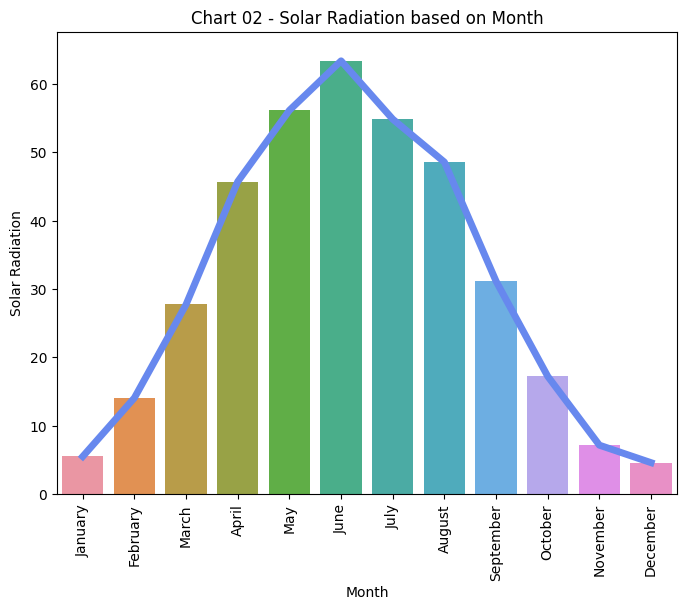

In [12]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data['month'], y=data['GHI'],linewidth=5,errorbar=None)
sns.barplot(x=data['month'], y=data['GHI'], errwidth=0)
plt.title('Chart 02 - Solar Radiation based on Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Solar Radiation')

The highest solar radiation is also happening in June.

Text(0, 0.5, 'Count')

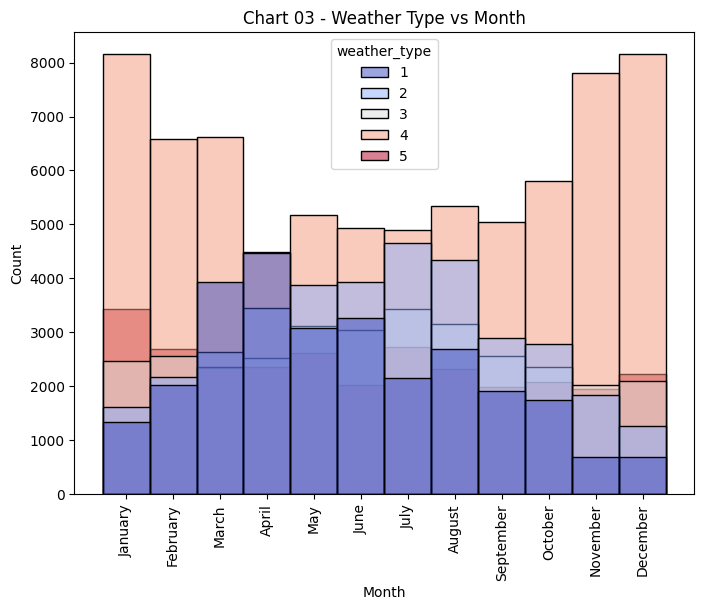

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['month'], hue=data['weather_type'], palette='coolwarm')
plt.title('Chart 03 - Weather Type vs Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Solar Radiation')

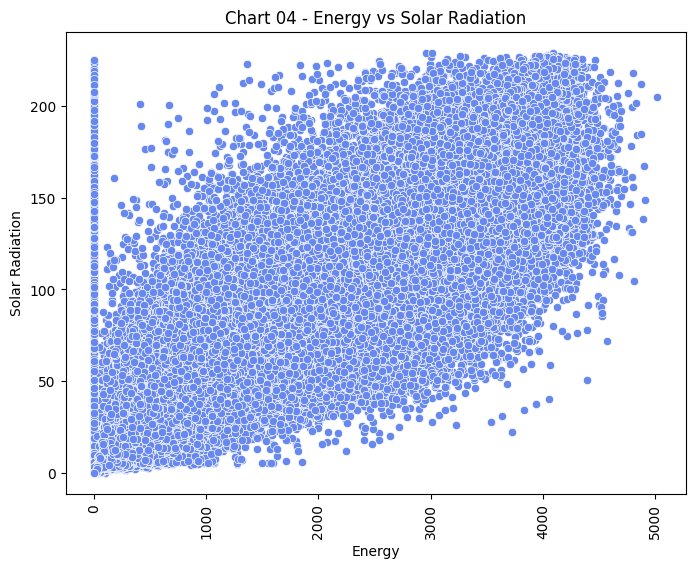

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Energy delta[Wh]'], y=data['GHI'])
plt.title('Chart 04 - Energy vs Solar Radiation')
plt.xlabel('Energy')
plt.xticks(rotation=90)
plt.ylabel('Solar Radiation')

We can clearly see the relationship between Energy and Solar Radiation. The level of radiation goes up as the level of energy goes up and vice-versa.

Text(0, 0.5, 'Energy')

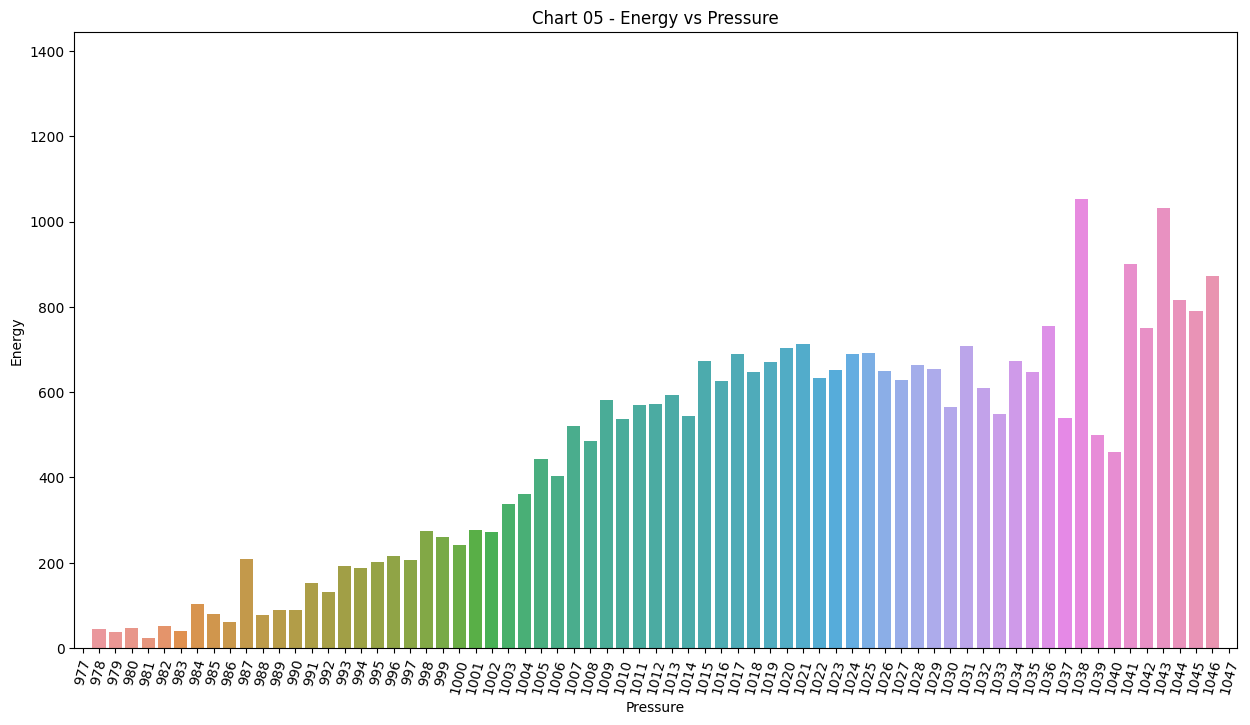

In [15]:
plt.figure(figsize=(15,8))
plt.title('Chart 05 - Energy vs Pressure')
sns.barplot(x=data['pressure'], y=data['Energy delta[Wh]'], errwidth=0)
plt.xlabel('Pressure')
plt.xticks(rotation=75)
plt.ylabel('Energy')

We can see there is no energy for pressure level 977 and 1047 besides that we can not see any type of relation between energy and pressure. But we can see that the energy level is not very much when the pressure is low. 

The highest energy we received at the pressure level 1038.

Text(0, 0.5, 'Solar Radiation')

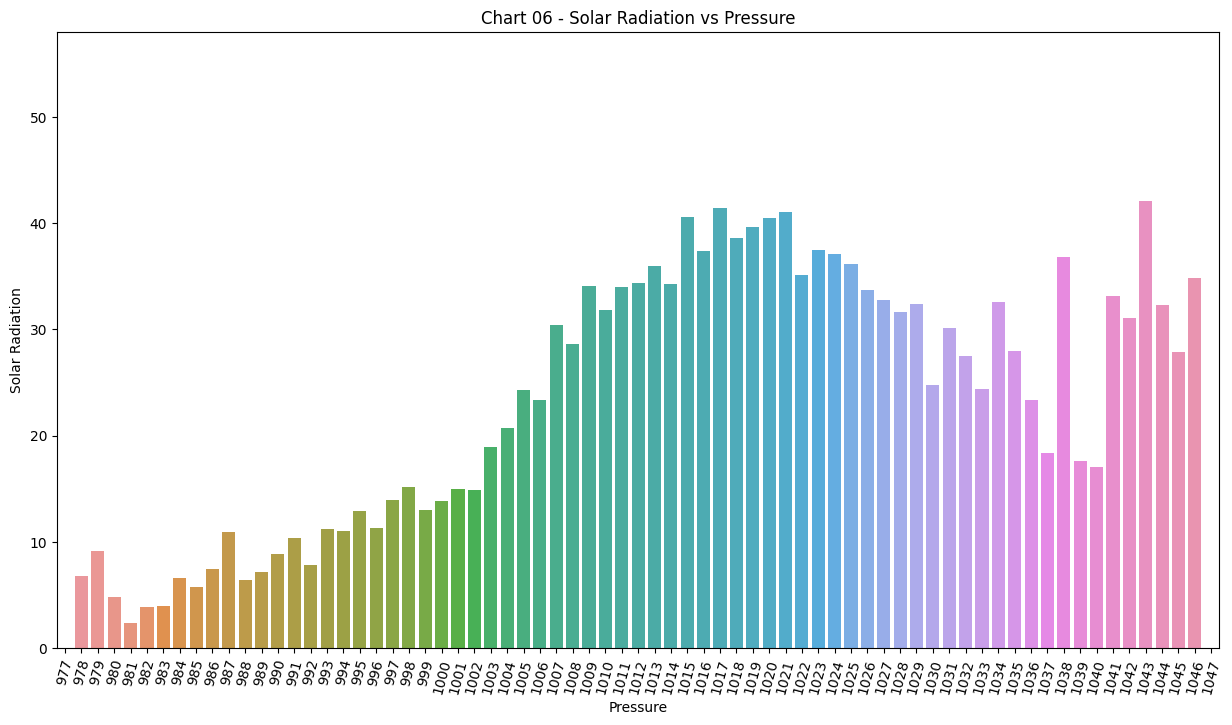

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x=data['pressure'], y=data['GHI'], errwidth=0)
plt.title('Chart 06 - Solar Radiation vs Pressure')
plt.xlabel('Pressure')
plt.xticks(rotation=75)
plt.ylabel('Solar Radiation')

Text(0, 0.5, 'Solar Radiation')

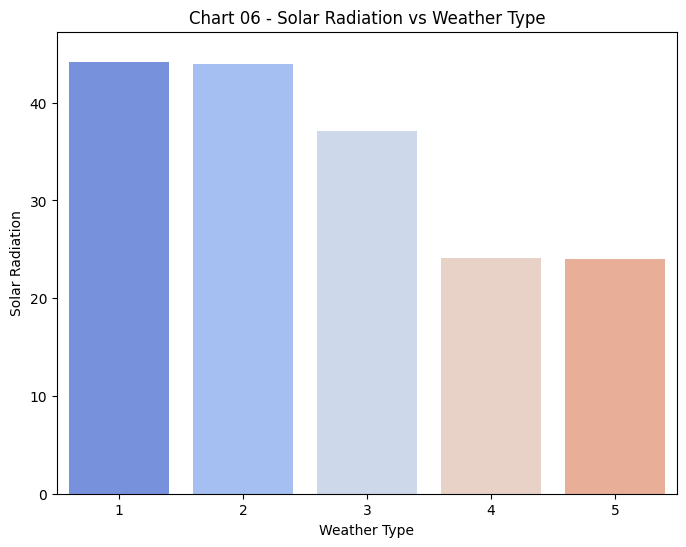

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['GHI'], errwidth=0)
plt.title('Chart 06 - Solar Radiation vs Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Solar Radiation')

The solar radiation level is very high in weather type 1 and 2 whereas it is at its lowest in weather type 4 and 5.

Text(0, 0.5, 'Energy')

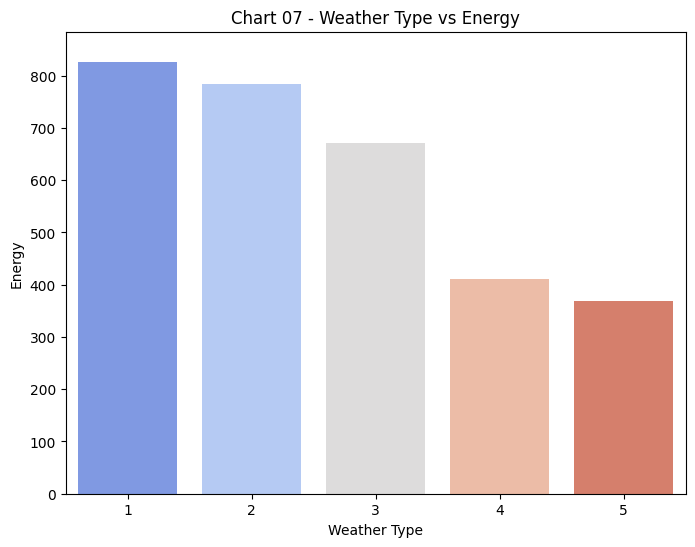

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['Energy delta[Wh]'], errwidth=0, palette='coolwarm')
plt.title('Chart 07 - Weather Type vs Energy')
plt.xlabel('Weather Type')
plt.ylabel('Energy')

The highest energy produced in weather type 1 and weather type 5 is producing the lowest energy.

Text(0, 0.5, 'Temperature')

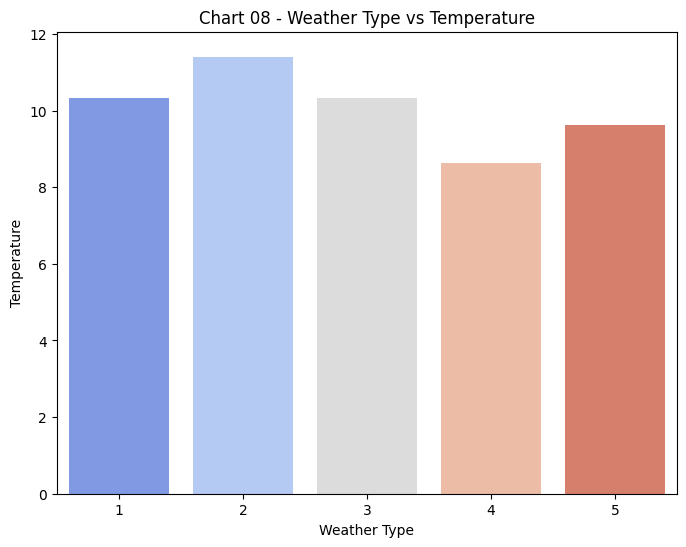

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['temp'], errwidth=0, palette='coolwarm')
plt.title('Chart 08 - Weather Type vs Temperature')
plt.xlabel('Weather Type')
plt.ylabel('Temperature')

The temerature level in all weather type is between 8-10 so we can say that the temperature doesn't vary much between different weathers.

Text(0, 0.5, 'Humidity')

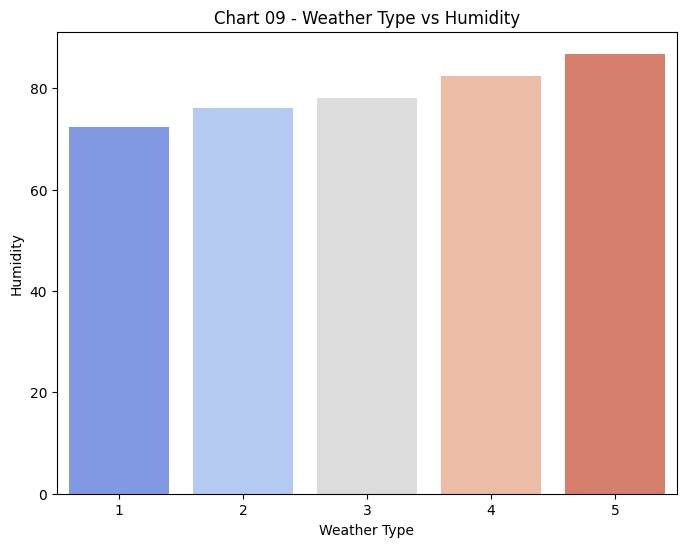

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['humidity'], errwidth=0, palette='coolwarm')
plt.title('Chart 09 - Weather Type vs Humidity')
plt.xlabel('Weather Type')
plt.ylabel('Humidity')

We can see from the above chart that as the weather type goes from 1 to 5 the level of humidity also goes up.

Text(0, 0.5, 'Humidity')

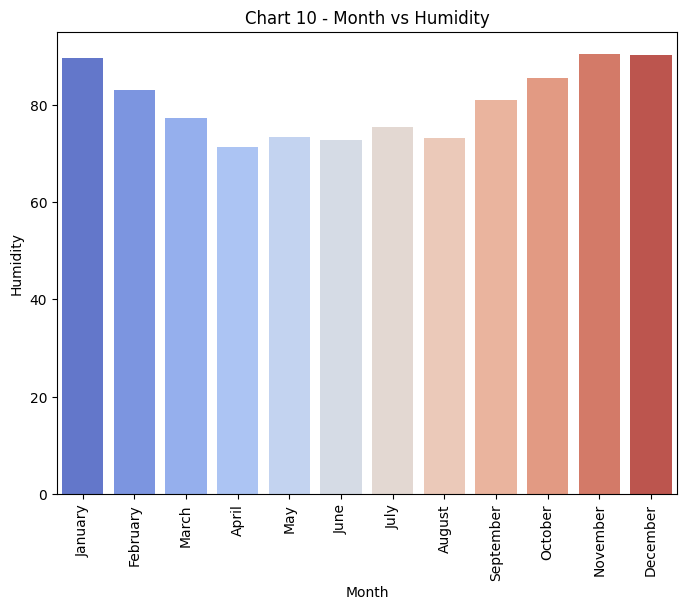

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['month'], y=data['humidity'], errwidth=0, palette='coolwarm')
plt.title('Chart 10 - Month vs Humidity')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Humidity')

The first and last quarter have highest humidity level than other months.

Text(0, 0.5, 'Wind Speed')

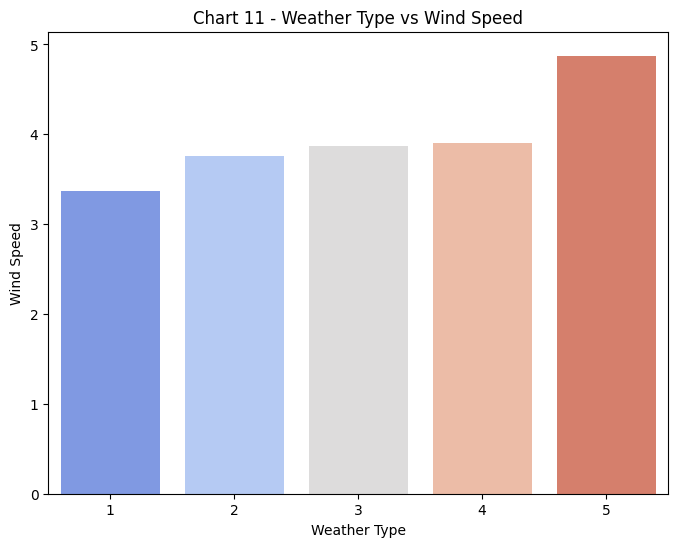

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['wind_speed'], errwidth=0, palette='coolwarm')
plt.title('Chart 11 - Weather Type vs Wind Speed')
plt.xlabel('Weather Type')
plt.ylabel('Wind Speed')

The highest wind level is in weather type 5 and the lowest is in 1.

Text(0, 0.5, 'Wind Speed')

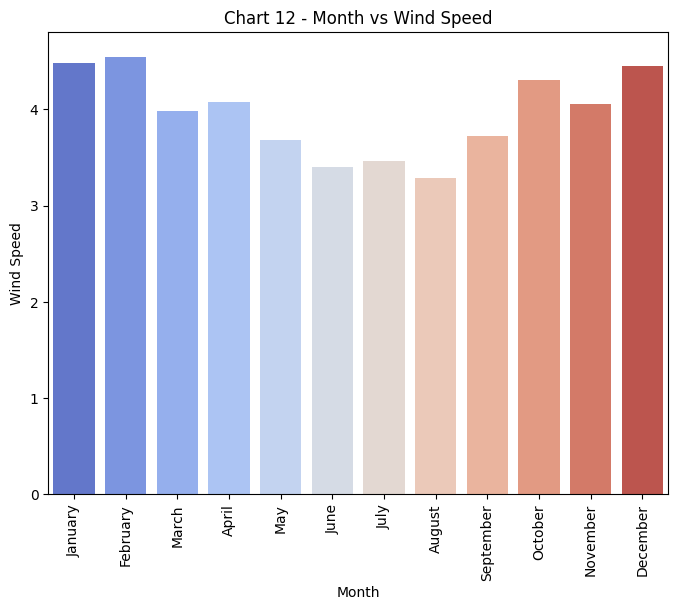

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['month'], y=data['wind_speed'], errwidth=0, palette='coolwarm')
plt.title('Chart 12 - Month vs Wind Speed')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Wind Speed')

January, February and the last quarter have much highesr wind speed than other months.

Text(0, 0.5, 'Rain')

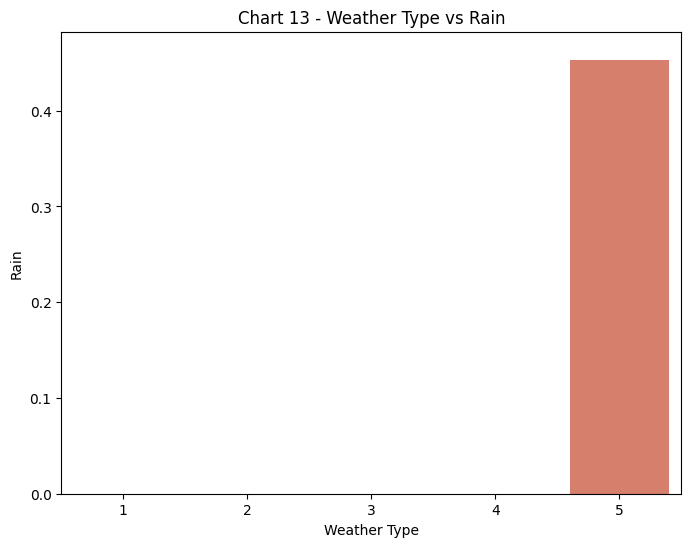

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['rain_1h'], errwidth=0, palette='coolwarm')
plt.title('Chart 13 - Weather Type vs Rain')
plt.xlabel('Weather Type')
plt.ylabel('Rain')

Text(0, 0.5, 'Rain')

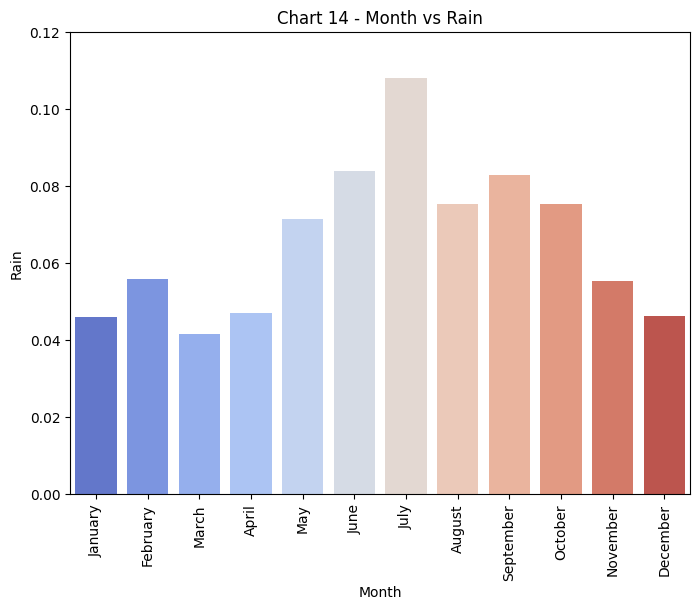

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['month'], y=data['rain_1h'], errwidth=0, palette='coolwarm')
plt.title('Chart 14 - Month vs Rain')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Rain')

It is quite normal that rainy season have high number of rain than other months.

Text(0, 0.5, 'Snow')

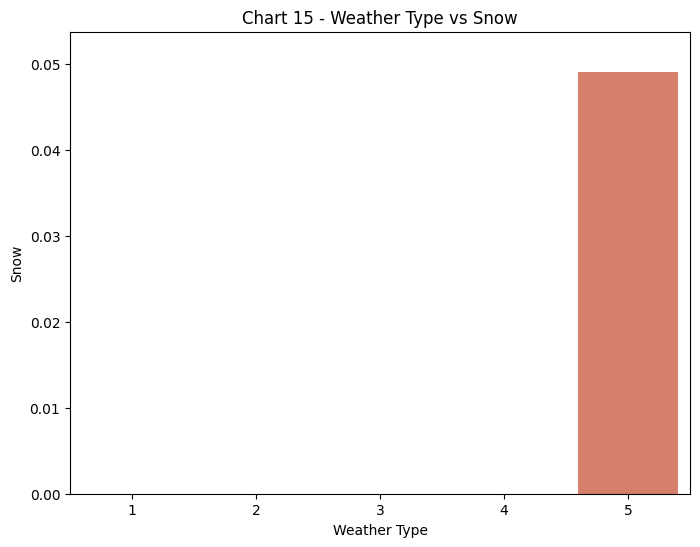

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['weather_type'], y=data['snow_1h'], errwidth=0, palette='coolwarm')
plt.title('Chart 15 - Weather Type vs Snow')
plt.xlabel('Weather Type')
plt.ylabel('Snow')

Text(0, 0.5, 'Snow')

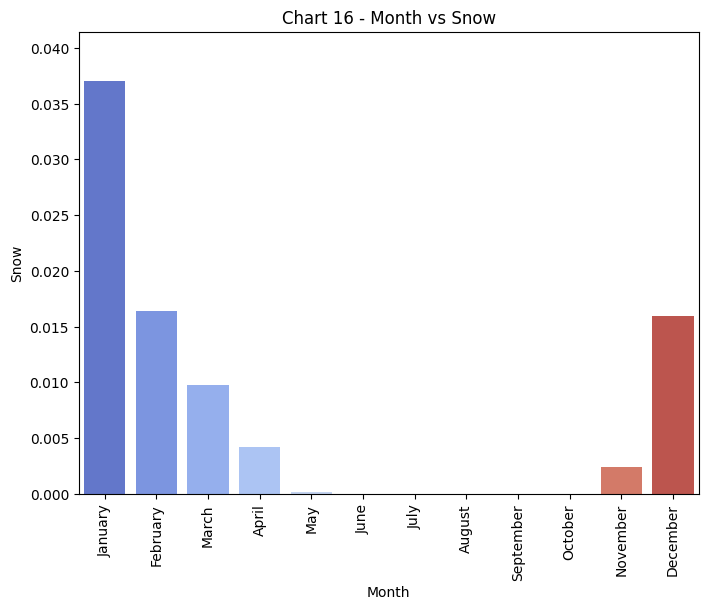

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['month'], y=data['snow_1h'], errwidth=0, palette='coolwarm')
plt.title('Chart 16 - Month vs Snow')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Snow')

The winter season have all the snow but out of that January month has highest snow than others.

Text(0, 0.5, 'Energy')

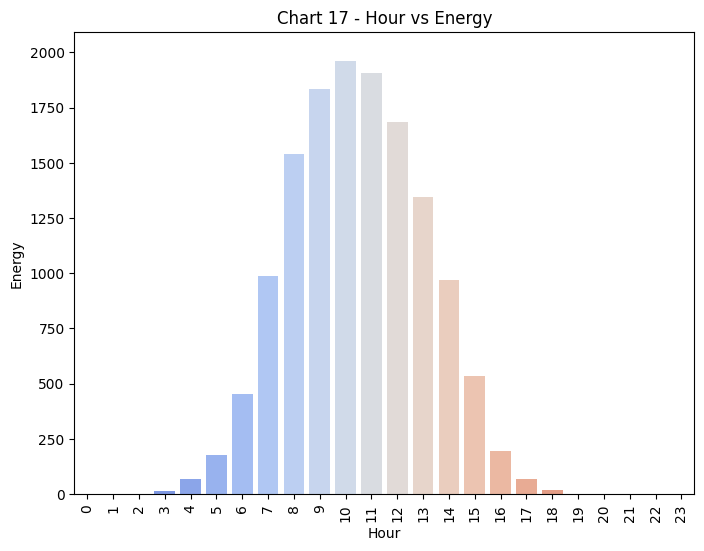

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['hour'], y=data['Energy delta[Wh]'], errwidth=0, palette='coolwarm')
plt.title('Chart 17 - Hour vs Energy')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Energy')

The energy curve is a clean bell curve. We can see as the hour increase from 0 the level of energy increases till hour 10 and from hour 11 it start decreasing all the way to the end.

Text(0, 0.5, 'Humidity')

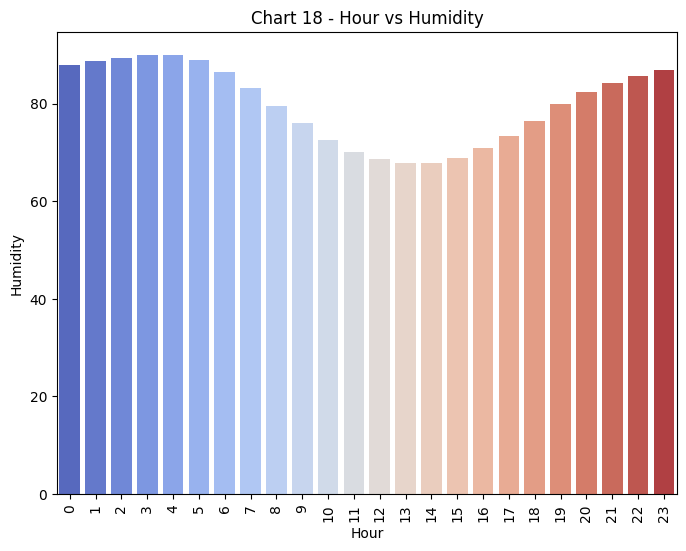

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['hour'], y=data['humidity'], errwidth=0, palette='coolwarm')
plt.title('Chart 18 - Hour vs Humidity')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Humidity')

After looking into the chart we find out that humidity level increase very slowly from hour 0 to hour 4 and after that it start decreasing all the way to hour 14. From hour 15 it again start increasing to the end.

Text(0, 0.5, 'Snow')

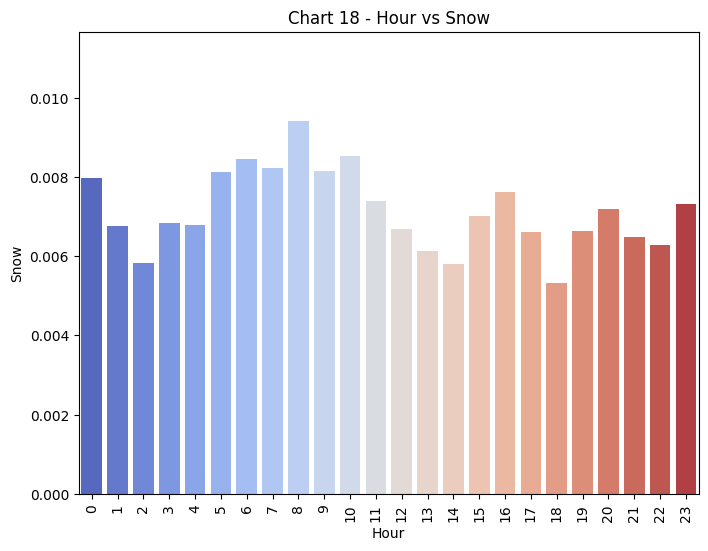

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['hour'], y=data['snow_1h'], errwidth=0, palette='coolwarm')
plt.title('Chart 18 - Hour vs Snow')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Snow')

We can't say which hour will the snow fall but it is clear from the chart that the 8th hour has highest snow fall than others.

Text(0, 0.5, 'Rain')

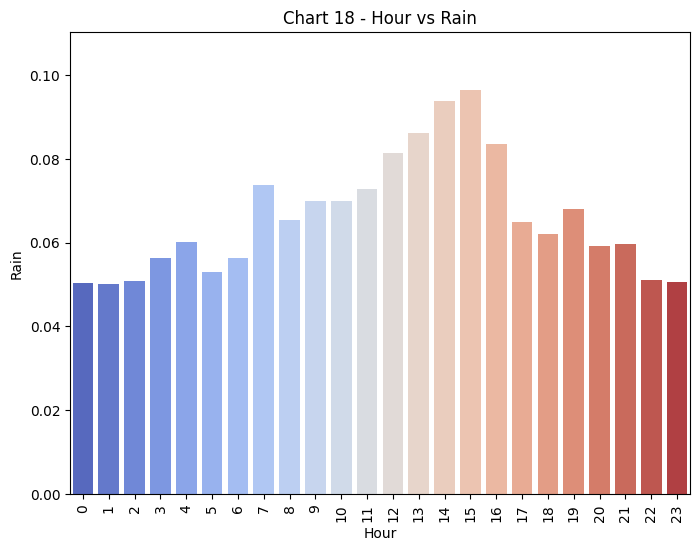

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['hour'], y=data['rain_1h'], errwidth=0, palette='coolwarm')
plt.title('Chart 18 - Hour vs Rain')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Rain')

The 15th hour is peak hour for rain.

Text(0, 0.5, 'Temperature')

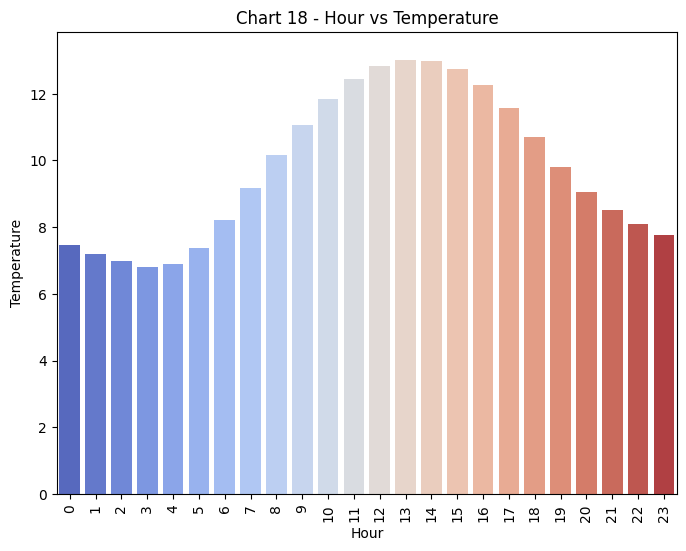

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['hour'], y=data['temp'], errwidth=0, palette='coolwarm')
plt.title('Chart 18 - Hour vs Temperature')
plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Temperature')

The relation between temperature and hour is understandable. The temperature will be less in night and morning but it will rise to its highest in noon and after that it will start decreasing in evening.